<a href="https://colab.research.google.com/github/1GuruSharan/Delinquency_prediction_dataset/blob/main/Delinquency_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Delinquency_prediction_dataset.xlsx to Delinquency_prediction_dataset.xlsx


In [29]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Delinquency_prediction_dataset.csv')

In [34]:
# Basic structure and preview
print("Shape of dataset:", df.shape)
df.head()

# Column info
df.info()



Shape of dataset: (500, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 


In [ ]:

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values:\n", missing)

# Summary stats (numerical & categorical)
df.describe(include='all').transpose()

In [31]:
# Credit utilization should be between 0 and 100
out_credit_util = df[(df['Credit_Utilization'] < 0) | (df['Credit_Utilization'] > 100)]

# Age should be reasonable (e.g., 18–100)
out_age = df[(df['Age'] < 18) | (df['Age'] > 100)]

# Debt-to-Income should be 0–100%
out_dti = df[(df['Debt_to_Income_Ratio'] < 0) | (df['Debt_to_Income_Ratio'] > 100)]

print(f"Invalid Credit Utilization: {len(out_credit_util)} rows")
print(f"Invalid Age: {len(out_age)} rows")
print(f"Invalid Debt-to-Income Ratio: {len(out_dti)} rows")


Invalid Credit Utilization: 0 rows
Invalid Age: 0 rows
Invalid Debt-to-Income Ratio: 0 rows


In [32]:
# Check correlation of numerical vars with Delinquent_Account
correlation = df.corr(numeric_only=True)['Delinquent_Account'].sort_values(ascending=False)
print("\nCorrelation with Delinquent_Account:\n", correlation)



Correlation with Delinquent_Account:
 Delinquent_Account      1.000000
Income                  0.045409
Credit_Score            0.034833
Debt_to_Income_Ratio    0.034386
Credit_Utilization      0.034224
Age                     0.022508
Loan_Balance           -0.004320
Missed_Payments        -0.026478
Account_Tenure         -0.039829
Name: Delinquent_Account, dtype: float64


In [50]:
import pandas as pd
import numpy as np

# Load your CSV file
df = pd.read_csv('/content/sample_data/Delinquency_prediction_dataset.csv')

#Generate synthetic Income values for missing entries (Normal distribution)
income_mean = df['Income'].mean()
income_std = df['Income'].std()
missing_income_count = df['Income'].isna().sum()

# Step 2: Select features and target
features = ["Income", "Credit_Utilization", "Missed_Payments"]
target = "Delinquent_Account"

X = df[features]
y = df[target]

# Step 3: Handle missing values (simple example: fill with median)
X = X.fillna(X.median())

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Predict probabilities on test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 8: Evaluate model using ROC AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score:.3f}")

# Step 9: Predict risk for a new customer
new_customer = pd.DataFrame({
    "Income": [45000],
    "Credit_Utilization": [0.3],
    "Missed_Payments": [1]
})
new_customer_scaled = scaler.transform(new_customer)
risk_score = model.predict_proba(new_customer_scaled)[:, 1][0]

print(f"Predicted delinquency risk for new customer: {risk_score:.2f}")

ROC AUC Score: 0.517
Predicted delinquency risk for new customer: 0.14


In [41]:
# 2. Median imputation for Loan_Balance
loan_balance_median = df['Loan_Balance'].median()
df['Loan_Balance'] = df['Loan_Balance'].fillna(loan_balance_median)

In [42]:
# 3. Mean imputation for Credit_Score
credit_score_mean = df['Credit_Score'].mean()
df['Credit_Score'] = df['Credit_Score'].fillna(credit_score_mean)

In [43]:
# Save cleaned dataset
df.to_csv('/content/Delinquency_dataset_cleaned.csv', index=False)

# Check if missing values are gone
print(df.isna().sum())


Customer_ID              0
Age                      0
Income                  39
Credit_Score             0
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance             0
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


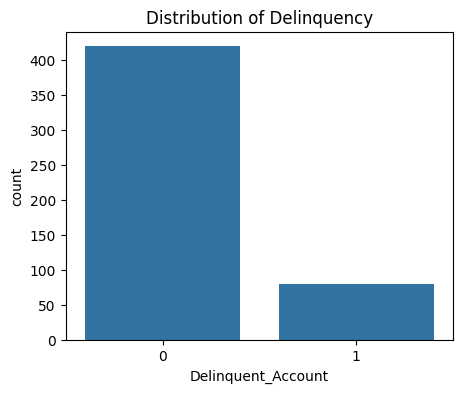

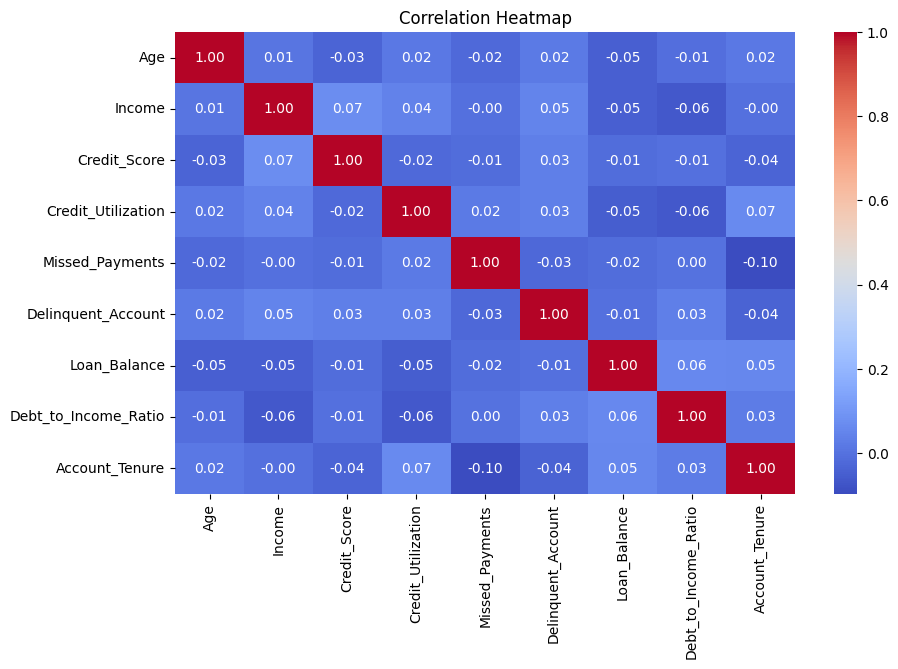

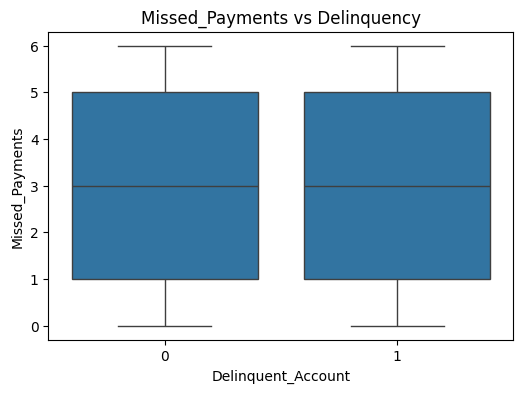

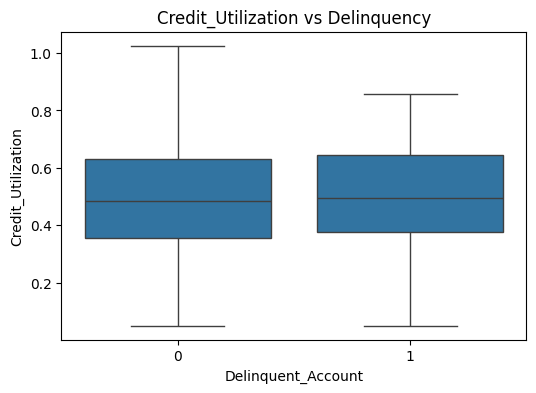

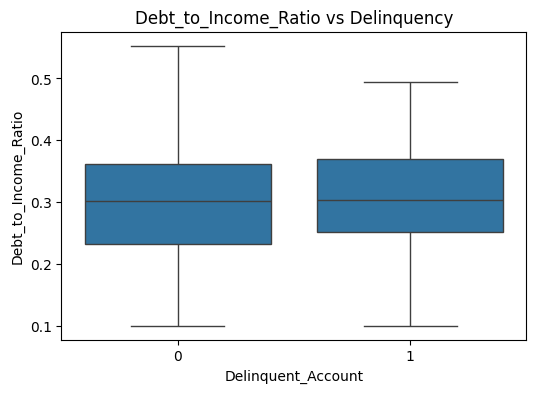

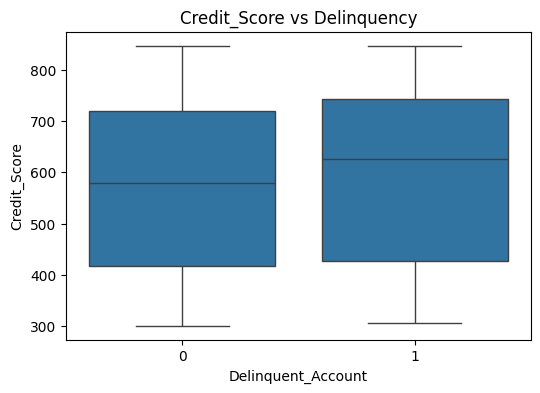

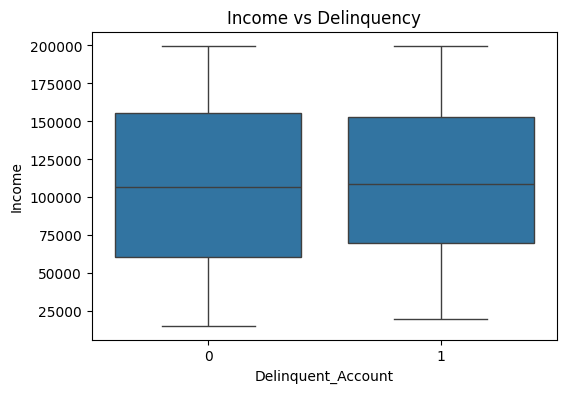

Delinquent_Account                0              1
Missed_Payments            2.990476       2.850000
Credit_Utilization         0.488505       0.506887
Debt_to_Income_Ratio       0.297445       0.306301
Credit_Score             575.158176     591.150000
Income                107306.943005  113902.013333


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Delinquent_Account', data=df)
plt.title('Distribution of Delinquency')
plt.show()

# Correlation heatmap for numeric variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Grouped statistics to see differences between delinquent and non-delinquent customers
risk_factors = ['Missed_Payments', 'Credit_Utilization', 'Debt_to_Income_Ratio', 'Credit_Score', 'Income']

for factor in risk_factors:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Delinquent_Account', y=factor, data=df)
    plt.title(f'{factor} vs Delinquency')
    plt.show()

# Quick aggregation table
summary_stats = df.groupby('Delinquent_Account')[risk_factors].mean().T
print(summary_stats)


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load your dataset
# Make sure to replace 'your_dataset.csv' with the correct file path if needed
try:
    df = pd.read_csv('/content/sample_data/Delinquency_prediction_dataset.csv')
except FileNotFoundError:
    print("Dataset not found. Please upload 'Delinquency_prediction_dataset.csv' or update the file path.")
    exit()


# Define features and target
features = ["Income", "Credit_Utilization", "Missed_Payments"]
target = "Delinquent_Account"

# Select features and target variables
X = df[features]
y = df[target]

# Handle missing values (simple imputation with median)
X = X.fillna(X.median())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model using ROC AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score:.3f}")

# Example of predicting risk for a new customer
new_customer_data = pd.DataFrame({
    "Income": [50000],
    "Credit_Utilization": [0.4],
    "Missed_Payments": [2]
})

# Scale the new customer data using the same scaler fitted on training data
new_customer_scaled = scaler.transform(new_customer_data)

# Predict the risk score for the new customer
risk_score = model.predict_proba(new_customer_scaled)[:, 1][0]

print(f"Predicted delinquency risk for a new customer: {risk_score:.2f}")

ROC AUC Score: 0.517
Predicted delinquency risk for a new customer: 0.14


## Plan to Evaluate Model Performance

To evaluate the credit risk prediction model, we will focus on key metrics that assess both its predictive accuracy and fairness.

### Key Metrics:

*   **ROC AUC (Receiver Operating Characteristic - Area Under Curve):** This metric measures the model's ability to distinguish between the two classes (delinquent and non-delinquent). An AUC of 1.0 indicates a perfect model, while an AUC of 0.5 indicates a model no better than random guessing. A higher AUC is generally desired. We will interpret this as the overall discriminatory power of the model.

*   **Accuracy:** This is the proportion of correctly predicted cases (both delinquent and non-delinquent) out of the total number of cases. While easy to understand, accuracy can be misleading in imbalanced datasets (where one class is much more frequent than the other), which is often the case with delinquency.

*   **F1 Score:** This is the harmonic mean of precision and recall. Precision is the proportion of correctly predicted delinquent cases out of all cases predicted as delinquent. Recall is the proportion of correctly predicted delinquent cases out of all actual delinquent cases. The F1 score provides a balanced measure of the model's performance, especially useful in imbalanced datasets.

*   **Fairness Checks:** It is crucial to assess if the model exhibits bias against specific customer groups (e.g., based on age, location, or other protected attributes). We will use fairness metrics such as:
    *   **Demographic Parity:** Checks if the proportion of predicted delinquent cases is similar across different groups.
    *   **Equalized Odds:** Checks if the true positive rate and false positive rate are similar across different groups.
    *   **Disparate Impact:** Measures if a particular group is disproportionately negatively impacted by the model's predictions.

### Interpretation:

*   A high **ROC AUC** indicates the model is generally good at ranking customers by risk.
*   **Accuracy** will be considered alongside other metrics, particularly in light of potential class imbalance.
*   A high **F1 Score** indicates a good balance between correctly identifying delinquent customers and not incorrectly flagging non-delinquent customers.
*   **Fairness checks** will highlight any potential biases, guiding further model adjustments or the implementation of bias mitigation techniques if necessary. We will aim for metrics that are reasonably similar across different groups to ensure fair outcomes.